In [1]:
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt  
import seaborn as sns  
%matplotlib inline

np.random.seed(42)
plt.style.use('ggplot')

# **Applying Discrete Uniform Distribution**

A small cafe business is selling only hot/cold drinks. They observed that there is no more favorable drink than the other based on the sales of each drink which is rare in the real world.

In which the unit of sales chart in a given year is distributed between **10 - 20** drinks per day.

In [2]:
cafe_sales = pd.read_csv('cafe_drinks_sales.csv')
cafe_sales.drop(columns = ['Unnamed: 0'], inplace=True)
cafe_sales.head(3)

,date,drinks_sales_per_day
0,2018-01-01,15
1,2018-01-02,12
2,2018-01-03,19


In [3]:
cafe_sales['date'].min(), cafe_sales['date'].max()

('2018-01-01', '2018-12-26')

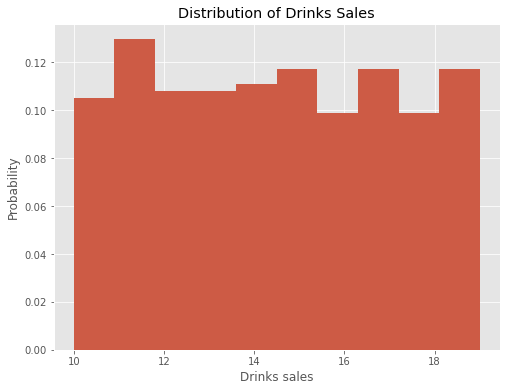

In [4]:
plt.figure(figsize=(8,6))
plt.hist(cafe_sales['drinks_sales_per_day'], density=True, color='#CD5B45')
plt.xlabel('Drinks sales')
plt.ylabel('Probability')
plt.title('Distribution of Drinks Sales')
plt.show()

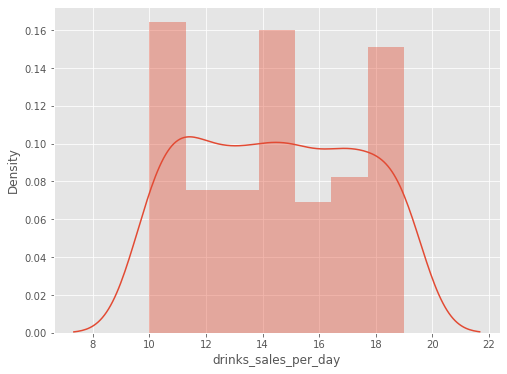

In [5]:
plt.figure(figsize=(8,6))
sns.distplot(cafe_sales['drinks_sales_per_day'], kde=True)
plt.show()

In [6]:
from scipy.stats import randint
from scipy.stats import uniform


def discrete_uniform_func(min_val,max_val):
    """define function that return the probability of unbiased 
   selection, each number is equally likely to be chosen(variables must be discrete in this case)"""
    x = np.arange(min_val, max_val+1)
    discrete_uniform = randint(min_val, max_val+1)
    probs = discrete_uniform.pmf(x)
    return probs
def discrete_uniform_left_cumulative_func(x, min_val, max_val):
    """function that return the cumulative probability 
    at less than or as maximum - left region of the distribution"""
    cd = uniform.cdf(x=x, loc=min_val, scale=max_val)
    return cd*100

def discrete_uniform_right_cumulative_func(x, min_val, max_val):
    """function that return the cumulative probability 
    at more than or at least - right region of the distribution"""
    cd = 1- uniform.cdf(x=x, loc=min_val, scale=max_val)
    return cd*100

def discrete_uniform_percentile_func(q, min_val, max_val):
    """function that used to calculate the percentile point given probability."""
    percentile = uniform.ppf(q=q, loc=min_val, scale=max_val)
    return percentile

In [7]:
discrete_uniform_func(10,20)

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

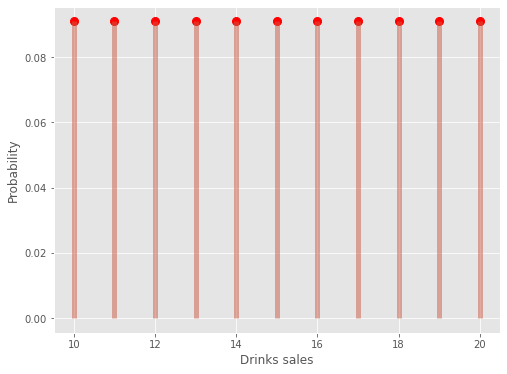

In [8]:
labels = np.arange(10, 21)
plt.figure(figsize=(8,6))
plt.plot(labels, discrete_uniform_func(10,20),'ro', ms=8)
plt.vlines(labels, 0,discrete_uniform_func(10,20), colors='#CD5B45', lw=5, alpha=0.5)
plt.xlabel('Drinks sales')
plt.ylabel('Probability')
plt.show()

#### *We notice that all the unit of sales have even chances*

### **The probability that a certain date will have a maximum sales of 15**

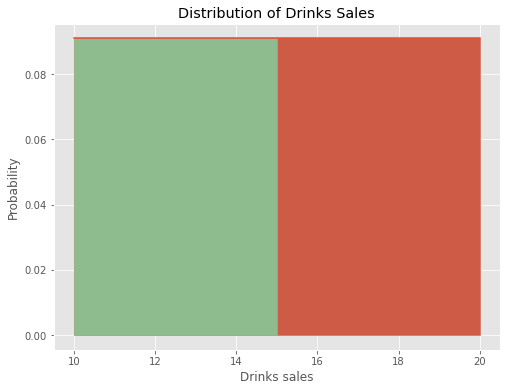

In [12]:
labels = np.linspace(10, 20, 11)
x_ax = np.linspace(10, 15, 11).astype('int')
plt.figure(figsize=(8,6))
plt.plot(labels, discrete_uniform_func(10,20))
plt.fill_between(labels, discrete_uniform_func(10,20), color='#CD5B45')
plt.fill_between(x_ax, discrete_uniform_func(10,20), color='#8FBC8F')
plt.xlabel('Drinks sales')
plt.ylabel('Probability')
plt.title('Distribution of Drinks Sales')
plt.show()

*In the above graph, the green region represents **P(X<=15 sales)**, the region of our interest..*

In [13]:
discrete_uniform_left_cumulative_func(15, 10, 20)

25.0

**Insight** : there's **25%** chance that the drinks sales is less than 15 per a day.

### **The probability that a certain date will have more than sales of 12**

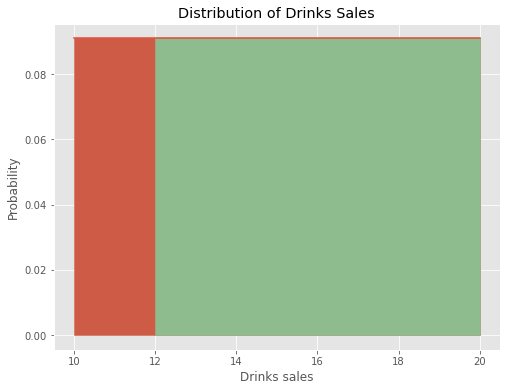

In [14]:
labels = np.linspace(10, 20, 11)
x_ax = np.linspace(12, 20, 11).astype('int')
plt.figure(figsize=(8,6))
plt.plot(labels, discrete_uniform_func(10,20))
plt.fill_between(labels, discrete_uniform_func(10,20), color='#CD5B45')
plt.fill_between(x_ax, discrete_uniform_func(10,20), color='#8FBC8F')
plt.xlabel('Drinks sales')
plt.ylabel('Probability')
plt.title('Distribution of Drinks Sales')
plt.show()

*In the above graph, the green region represents **P(X>12 sales)**, the region of our interest..*

In [15]:
discrete_uniform_right_cumulative_func(12, 10, 20)

90.0

**Insight** : there's **90%** chance that the drinks sales is more than 12 per a day.

### **30th percentile of the cafe drinks sales**

In [16]:
discrete_uniform_percentile_func(0.3, 10, 20)

16.0

*30% of the cafe drinks sales is 16 drinks sales per day..*

# **Applying Continuous Uniform Distribution**


*take a infinite number of outcomes and each outcome has equal probability of selection*

Suppose we are a client who is interested in signing a contract with one of 5 selected shipping companies after the search has been done , and we want to know if there's any differences in terms of shipping time between these companies.

Also , we know that the shipping companies in China usually take shipping time between 1 - 5 days.

Therefore , each company has an equal chance of shipment time due to the customs system applied in the country. If so, is it possible that one of these shipment companies would have a different chance than its rival.

In [9]:
shipping_data = pd.read_csv('shipping_companies.csv')
shipping_data.head(3)

,company_name,shipping_days
0,AEB Logistics,1.6
1,Kerry Apex,2.1
2,JiuFang E-commerce Logistics,3.4


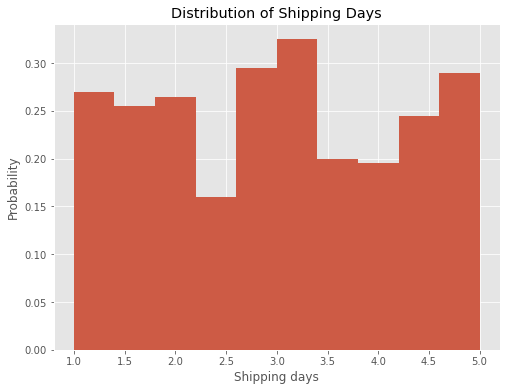

In [10]:
plt.figure(figsize=(8,6))
plt.hist(shipping_data['shipping_days'], density=True, color='#CD5B45')
plt.xlabel('Shipping days')
plt.ylabel('Probability')
plt.title('Distribution of Shipping Days')
plt.show()

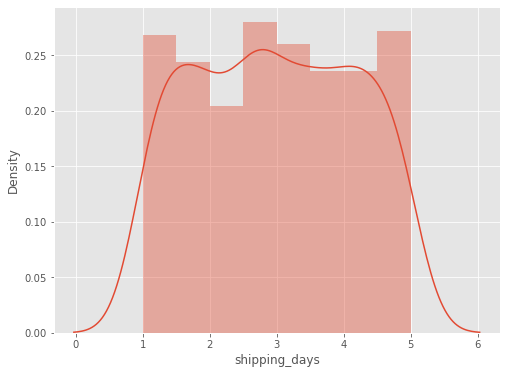

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(shipping_data['shipping_days'], kde=True)
plt.show()

In [12]:
def continuous_uniform_func(min_val,max_val, size):
    """define function that return the probability of unbiased 
   selection, each continuous number is equally likely to be chosen(variables must be continuous in this case)"""
    x = np.linspace(min_val, max_val, size)
    continuous_uniform = uniform.pdf(x, loc=min_val, scale=max_val)
    return continuous_uniform
def continuous_uniform_left_cumulative_func(x, min_val, max_val):
    """function that return the cumulative probability 
    at less than or as maximum - left region of the distribution"""
    cd = uniform.cdf(x=x, loc=min_val, scale=max_val)
    return cd*100

def continuous_uniform_right_cumulative_func(x, min_val, max_val):
    """function that return the cumulative probability 
    at more than or at least - right region of the distribution"""
    cd = 1- uniform.cdf(x=x, loc=min_val, scale=max_val)
    return cd*100

def continuous_uniform_percentile_func(q, min_val, max_val):
    """function that used to calculate the percentile point given probability."""
    percentile = uniform.ppf(q=q, loc=min_val, scale=max_val)
    return percentile

In [13]:
continuous_uniform_func(1,5, 500)[0:10]

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

### **The probability that the companies will take a maximum of 3 shipping days**

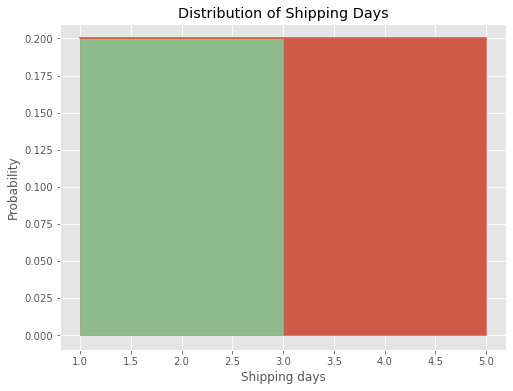

In [14]:
labels = np.linspace(1, 5, 500)
x_ax = np.linspace(1, 3, 500)
plt.figure(figsize=(8,6))
plt.plot(labels, continuous_uniform_func(1,5, 500))
plt.fill_between(labels, continuous_uniform_func(1,5, 500), color='#CD5B45')
plt.fill_between(x_ax, continuous_uniform_func(1,5, 500), color='#8FBC8F')
plt.xlabel('Shipping days')
plt.ylabel('Probability')
plt.title('Distribution of Shipping Days')
plt.show()

*In the above graph, the green region represents **P(X<=3 days)**, the region of our interest..*

In [24]:
continuous_uniform_left_cumulative_func(3, 1, 5)

40.0

**Insight** : there's **40%** chance that the companies shipping days is less than 3 days.

### **The probability that a companies will take more than 2 of shipping days**

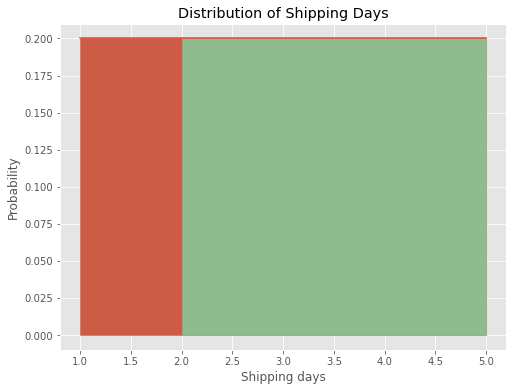

In [25]:
labels = np.linspace(1, 5, 500)
x_ax = np.linspace(2, 5, 500).astype('int')
plt.figure(figsize=(8,6))
plt.plot(labels, continuous_uniform_func(1,5, 500))
plt.fill_between(labels, continuous_uniform_func(1,5, 500), color='#CD5B45')
plt.fill_between(x_ax, continuous_uniform_func(1,5, 500), color='#8FBC8F')
plt.xlabel('Shipping days')
plt.ylabel('Probability')
plt.title('Distribution of Shipping Days')
plt.show()

In the above graph, the green region represents **P(X>2 days)**, the region of our interest..

In [26]:
continuous_uniform_right_cumulative_func(2,1,5)

80.0

**Insight** : there's **80%** chance that the companies will take more than 2 shipping days.

### **50th percentile of the companies shipping days**

In [27]:
continuous_uniform_percentile_func(0.5,1,5)

3.5

**Insight** : 50% of  time the company's shipping days are **3.5 days**.